In [88]:
#Import Libraries
from bs4 import BeautifulSoup
import re
import pandas as pd
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib
from textblob import TextBlob


# Install new libraries
#%pip install pyspellchecker
#%pip install TextBlob

In [89]:
# Load Scraped Data
vodafone_reviews = pd.read_csv('vodafone_reviews.csv')  

In [90]:
##############################################################
########## Data Cleansing and Normalization pipeline ######### 

In [91]:
# Set everything to lower case

vodafone_reviews['review'] = vodafone_reviews['review'].str.lower()
vodafone_reviews['title'] = vodafone_reviews['title'].str.lower()

In [122]:
# Identify unknown words, coloquialisms and unusual punctuation
# Unknown words are identified using https://pypi.org/project/pyspellchecker/

# get list of unknown words

def strip_punct(word):
    word =  re.sub("[,\.;:\(\)\{\}\[\]!?\"\s\n\$%_\/]", " ", word)
    word =  re.sub("\s+", " ", word)
    return word

def list_of_words(df, column):
    word_frame = pd.DataFrame(columns = ["words"])
    for i in range(len(df)):
        words = strip_punct(df[column].iloc[i])
        words = words.split(" ")
        word_frame = word_frame.append(pd.DataFrame(words,columns = ["words"]))
        
    return word_frame

# Create dataframe containing list of words
word_frame = list_of_words(vodafone_reviews, "review")

word_frame = word_frame.append(list_of_words(vodafone_reviews, "title"))

# remove empty strings from list
word_frame = word_frame[word_frame['words']!=""]

# Initialise spellchecker

spell = SpellChecker()

unknown_words = spell.unknown(word_frame["words"].to_list())

unknown_word_counts = word_frame[word_frame['words'].isin(unknown_words)].value_counts().rename_axis('words').reset_index(name='count')


known_word_counts = word_frame[~word_frame['words'].isin(unknown_words)].value_counts().rename_axis('words').reset_index(name='count')



print(str(word_frame.words.nunique()) + " " + "Unique terms were found in the data")
print(str(len(unknown_words)) + " " + "Unknown terms found")
print("")
print(unknown_words)



8706 Unique terms were found in the data
1839 Unknown terms found

{'footscray', 'appallingso', 'cbd', 'th', '4-minute', 'kavita', '90+', 'complaini', 'off-', 'reactiving', 'optus', 'thoughout', '60-85', 'l', 'storemy', 'toowong', '5years', 'inapt', 'geniinely', 'wonderphone', 'occations', 'ml', 'set-up', 'jb-hi-fi', 'isssue', 'kpis', 'p', 'pls', 'disapointed', 'adsl2+', 'f#', 'areception', 'bcos', "'technical", 'probelm', '24months', 'excellentcustomer', 'minuttes', 'no-one', "'it", 'auto-phone', 'coomera', 'nothingeverything', 'numebrsync', 'ps5', 'demand-', 'r15', 'totell', '31-10-2015which', 'againso', '01mb', 'n', 'helensvale', 'en-devour', 'non-existant', 'farunstable', 'wi-fi', 'untrustworthyworthy', 'adviceinthe', '2months', 'gliches', 'serviceability', 'servicability', 'pm', 'erina', 'unavailability', 'service-', "'cooling", 'launceston', 'nokia', '9-10', 'mpany', '78customer', 'release3d', '2am', 'chaddy', 'doublecheck', '10mb', 'guestermating', 'servica', 'myselfwhoever', 's

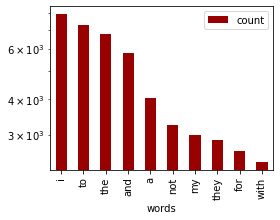

In [126]:
# Most common Known Words
known_word_counts.head(10).plot(kind='bar',x='words', y='count', figsize=(4,3), logy=True, color='#990000' );


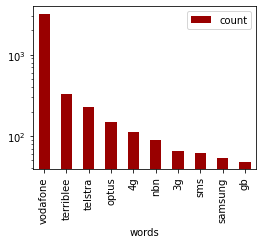

In [123]:
# Most Common Unknown Words
unknown_word_counts.head(10).plot(kind='bar',x='words', y='count', figsize=(4,3), logy=True, color='#990000' );


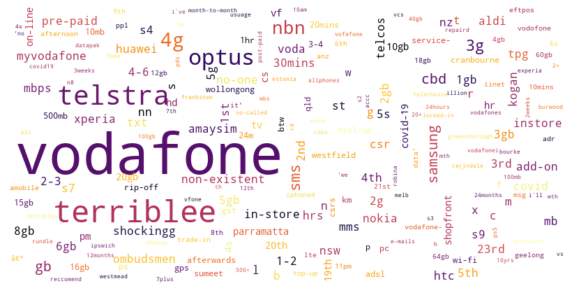

In [141]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_unknown_words = word_frame[word_frame['words'].isin(unknown_words)]['words'].value_counts()

#print(all_unknown_words)

wordcloud_unknown = WordCloud(max_font_size=40, max_words=100000, random_state=2021, scale=2,
                             background_color='white', contour_width=3, 
                             collocations=False, colormap='inferno').generate_from_frequencies(all_unknown_words);

plt.figure(figsize=(10, 7));
plt.imshow(wordcloud_unknown, interpolation='bilinear')
plt.axis("off");

In [96]:
# Create spelling and punctuation correction dictionary

spelling_dict ={'unsatesfaied' : "unsatisfied", 
                'diputes' : "disputes", 
                'watiting' : "waiting",
                'avoidafone' : "vodafone", 
                'smss' : "sms", 
                'abismal' : "abysmal", 
                'wose' : "worse", 
                'renegged' :"reneged", 
                'exisiting' : "existing",  
                'postpaid' : "post paid", 
                'vodafonetechnical' : "vodafone technical", 
                'thx' : "thanks", 
                'unethial' : "unethical", 
                'vodafones' : "vodafone's", 
                'vodaphone' : "vodafone", 
                'custormer' : "customer", 
                "'ok'" : "ok", 
                'vodafoneâ€™s' : "vodafone's", 
                'whatdafail' : "vodafone", 
                'excellant' : "excellent",
                'vodacrud' : "vodafone", 
                'infurtiating' : "infuriating", 
                'wrost' : "worst", 
                'vodaphony' : "vodafone", 
                'exremely' : "extremely", 
                'definiton': "definition", 
                'erros' : "errors", 
                'disapppointment' : "disappointment", 
                'fraudulents' : "fraudulent", 
                'riiiiiipppp' : "rip",  
                'datpak' : "data pack", 
                'experiance' : "experience", 
                'vodafail' : "vodafone", 
                'unstatisified' : "unsatisfied", 
                'shockin' : "shocking", 
                'expesnsive' : "expensive", 
                'canâ€™t' : "can't", 
                '&amp' : "&", 
                'onya' : "good on you", 
                'liers' : "liars", 
                'discusting' : "discusting", 
                'itâ€™s' : "it's", 
                'pocketwifi' : "pocket wifi", 
                'hanset' : "handset", 
                'traped' : "trapped", 
                'untrust' : "untrustworthy", 
                'donâ€™t' : "doesn't", 
                'f+ã—ã·==king' : "fucking", 
                'problam' : "problem", 
                'vodafoney' : "vodafone", 
                '6year' : "6 year", 
                'repaire' : "repair", 
                'vodaphones' : "vodafone's", 
                "'vodaphone'" : "vodafone", 
                'cancle' : "cancel", 
                'bulshit': "bullshit", 
                'vodaafone' : "vodafone", 
                'expoit' : "exploit", 
                'wouldnâ€™t' : "wouldn't", 
                'appaling' : "appalling", 
                'netowrk' : "network",  
                'exellent' : "excellent", 
                'vodadfone' : "vodafone", 
                "vodaphone's" : "vodafone's", 
                't&amp' : " ", 
                'okhay' : "ok", 
                'appauling' : "appalling", 
                'doesnâ€™t' : "doesn't", 
                'voda ' : "vodafone ", 
                'techncial' : "technical", 
                'obudsman' : "ombudsman", 
                'redglobal' : "red global", 
                'vodafhone' : "vodafone", 
                'â€¦' : " ", 
                'coustmer' : "customer", 
                'apauling' : "appalling", 
                "telco's" : "telcos", 
                'exspence' : "expense", 
                'terribl' : "terrible", 
                'hopless' : "hopeless", 
                'vodapone' : "vodafone", 
                'recind' : "rescind",
                'â€™' : "'"}

In [97]:
#  Replace misspelled and unusual words using custom dictionary

def replace_words(text, dictionary):
    for (word, replacement) in dictionary.items():
        text = text.replace(word, replacement)
    #print(text)
    return text

for i in range(len(vodafone_reviews)):
    vodafone_reviews['review'].loc[i] = replace_words(vodafone_reviews['review'].loc[i], spelling_dict)
    vodafone_reviews['title'].loc[i] = replace_words(vodafone_reviews['title'].loc[i], spelling_dict)


C:\Users\matth\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [98]:
# create a dictionary of common expansions in the english language
contractions_dict = {"can't": "can not",
                         "won't": "will not",
                         "don't": "do not",
                         "n't":" not",
                         "'m":" am",
                         "'ll":" will",
                         "'d":" would",
                         "'ve":" have",
                         "'re":" are",
                         "'s": ""} # 's could be 'is' or could be possessive: it has no expansion

In [99]:
#  Expand contractions

def replace_words(text, dictionary):
    for (word, replacement) in dictionary.items():
        text = text.replace(word, replacement)
    #print(text)
    return text

for i in range(len(vodafone_reviews)):
    vodafone_reviews['review'].loc[i] = replace_words(vodafone_reviews['review'].loc[i], contractions_dict)
    vodafone_reviews['title'].loc[i] = replace_words(vodafone_reviews['title'].loc[i], contractions_dict)


In [100]:
# Sentiment score each review
#############################################

nltk.download('vader_lexicon')

# Create a Sentiment Intensity Analyser object
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis for extracted sentences
sentiment = vodafone_reviews['review'].apply(lambda r: sid.polarity_scores(r))
sentiment = pd.DataFrame(list(sentiment))
# Combine sentiment scores with sentence corpus

# Check that the corpus of individuola sentences and
# Sentiment scores are the same length
print(len(vodafone_reviews))
print(len(sentiment))

# Concatenate the sentement scores with the sentences being analyised
vodafone_reviews_expanded =  pd.concat([vodafone_reviews,sentiment['compound']], axis=1)
vodafone_reviews_expanded

# Set scores and sentiments to numeric

vodafone_reviews_expanded[["score", "compound"]] = vodafone_reviews_expanded[["score", "compound"]].apply(pd.to_numeric)

vodafone_reviews_expanded = vodafone_reviews_expanded.rename(columns={"compound" : "review_sentiment"})

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


1903
1903


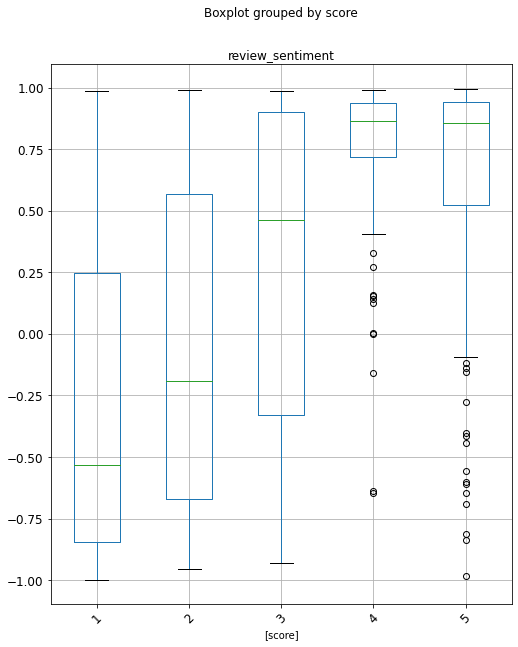

In [101]:
# Display a boxplot of sentiment scores for each promoter score

bplot = vodafone_reviews_expanded[['score', 'review_sentiment']].boxplot( by="score", rot=45, fontsize=12, figsize=(8,10));



In [102]:
# Tokenise data to single sentences

nltk.download('punkt')


# Create a data frame to contain corpus of sentence
processed_columns = pd.DataFrame(columns=['sentences', 'lemmatised_title' , 'noun_phrases','lemmatised_sentences', 'bi_grams', 'tri_grams', 'words', 'nouns'])

# Return sentences as a tuple containing the sentence and sentiment score

def sentence_sentiment_tuples(sentences, promoter_score):
    tuple_list = []
    for sentence in sentences:
        sentiment = sid.polarity_scores(sentence)["compound"]
        tuple_list = tuple_list + [(sentence, sentiment, promoter_score)]
    return tuple_list


# Iterate through expanded corpus, extracting sentenses 
for i in range(len(vodafone_reviews_expanded)):
    # Parse document into sentenses
    sentence_list = nltk.tokenize.sent_tokenize(vodafone_reviews_expanded.review[i])
    
    # Add title as first sentence of review
    sentence_list = [vodafone_reviews_expanded.title.iloc[i]] + sentence_list
    
    sentence_tuples = sentence_sentiment_tuples(sentence_list, vodafone_reviews_expanded.score[i])
    processed_columns = processed_columns.append(pd.DataFrame({"sentences" : [sentence_tuples]}))
    processed_columns.lemmatised_title.iloc[i] = vodafone_reviews_expanded.title[i]
    #print(sentence_list)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [116]:
processed_columns.head()

,sentences,lemmatised_title,noun_phrases,lemmatised_sentences,bi_grams,tri_grams,words,nouns
0,[(vodafone almost ruined my life - stolen iden...,vodafone almost ruin life steal identity security,"[(company database leak, -0.34, 1), (vodafone ...",[(vodafone almost ruin life steal identity sec...,"[(ruin life, -0.5584, 1), (life steal, -0.5584...","[(vodafone almost ruin, -0.5584, 1), (ruin lif...","[(vodafone, -0.5584, 1), (almost, -0.5584, 1),...","[(vodafone, -0.5584, 1), (life, -0.5584, 1), (..."
0,"[(misguided sale, 0.0, 1), (misguided salecoup...",misguide sale,"[(trade in value, 0.34, 1), (old phone, 0.34, ...","[(misguide, 0.0, 1), (misguided salecouple day...","[(misguide sale, 0.0, 1), (misguided salecoupl...","[(misguided salecouple day, 0.34, 1), (trade i...","[(misguide, 0.0, 1), (misguided, 0.34, 1), (sa...","[(misguide, 0.0, 1), (salecouple, 0.34, 1), (d..."
0,"[(worst network, -0.6249, 1), (worst network f...",bad network,"[(mobile phone, -0.7227, 1), (i need data, -0....","[(bad network, -0.6249, 1), (bad network data ...","[(bad network, -0.6249, 1), (bad network, -0.6...","[(network for data, -0.6249, 1), (i use vodafo...","[(bad, -0.6249, 1), (network, -0.6249, 1), (ba...","[(network, -0.6249, 1), (network, -0.6249, 1),..."
0,"[(insurance contract with them is bullshit, -0...",insurance contract with them bullshit,"[(insurance contract, -0.5859, 1), (free phone...","[(insurance contract bullshit, -0.5859, 1), (c...","[(insurance contract, -0.5859, 1), (year plan,...","[(plan with insurance, 0.3612, 1), (month free...","[(insurance, -0.5859, 1), (contract, -0.5859, ...","[(insurance, -0.5859, 1), (contract, -0.5859, ..."
0,[(record all your phonecalls with them when yo...,record all your phonecalls with them when you ...,"[(decent coverage, 0.0, 1), (cheap price, 0.0,...","[(record phonecalls issue, 0.0, 1), (parent vo...","[(decent coverage, 0.0, 1), (cheap price, 0.0,...","[(thats strictly due, 0.0, 1), (company with d...","[(record, 0.0, 1), (phonecalls, 0.0, 1), (issu...","[(record, 0.0, 1), (issue, 0.0, 1), (parent, 0..."


In [117]:
#### Extract and lemmatize Noun Phrases
nltk.download('brown')


import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
import numpy as np
import spacy
nlp = spacy.load('en_core_web_sm')


# Return a lemmatized version of a string
def lemmatize_string(text):
    # Return an empty string if a None object is received
    if text is None:
        return ""
    
    # Return empty string if a strng is not received
    if not  isinstance(text, str):
        return ""
    
    lemmatizer = WordNetLemmatizer()

    # tokenise the sentence and determine part of speech tagging
    # for each word
    pos_tagged_text = nltk.pos_tag(nltk.word_tokenize(text))  
    
    # Convert the POS tagging from nltk.pos_tag
    # to the wordnet POS identifier recognised
    # by WordNetLemmatizer()
    words_tagged =[]
    for word in pos_tagged_text:
        if word[1].startswith('J'):
            word=(word[0], wordnet.ADJ)
        elif word[1].startswith('V'):
            word=(word[0], wordnet.VERB)
        elif word[1].startswith('N'):
            word=(word[0], wordnet.NOUN)
        elif word[1].startswith('R'):
            word=(word[0], wordnet.ADV)
        else:
            word=(word[0], None)
        words_tagged.append(word)
    
    # Lemmatize each word according to it's determined word class
    lemmatized = []
    for word, tag in words_tagged:
        if tag is None:
            lemmatized.append(word)
        else:        
            lemmatized.append(lemmatizer.lemmatize(word, tag))
    
    # reconstruct and returne lemmatized sentence
    seperator = ' '
    return seperator.join(lemmatized)


# remove everything that isn't text
# and remove 1 and 2 letter words
def scrub_text(text):
    # Remove numbers
    text =  re.sub('(?<=\s)\d+(?=\s)', '', text)
    # remove single and double character terms
    text = re.sub("(?<=\s)\w{1,2}(?=\s)", "", text)
    # remove non word characers except for spaces
    text =  re.sub('[^\w\s]',' ', text)
    # condence multple spaces
    text =  re.sub('\s+',' ', text)
    # remove non word characters
    text =  re.sub('[^\w\s]','', text)
    return(text)

def extract_noun_phrase_list(sentence, sentiment, promoter_score):
    tuple_list = []
    blob = TextBlob(sentence)
    phrases = blob.noun_phrases
    for phrase in phrases:
        if len(phrase)>0:
            #print(scrub_text(phrase))
            tuple_list = tuple_list + [(lemmatize_string(scrub_text(phrase)), sentiment, promoter_score)]
    
    return tuple_list
        

for i in range(len(processed_columns)):
    np_list = []
    for sentence in processed_columns.sentences.iloc[i]:
        noun_phrases = extract_noun_phrase_list(sentence[0], sentence[1], sentence[2])
        if len(noun_phrases)>0:
            np_list = np_list + noun_phrases
    processed_columns.noun_phrases.iloc[i] = np_list

processed_columns.noun_phrases.head()



[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0    [(company database leak, -0.34, 1), (vodafone ...
0    [(trade in value, 0.34, 1), (old phone, 0.34, ...
0    [(mobile phone, -0.7227, 1), (i need data, -0....
0    [(insurance contract, -0.5859, 1), (free phone...
0    [(decent coverage, 0.0, 1), (cheap price, 0.0,...
Name: noun_phrases, dtype: object

In [105]:
# Remove stop words from sentences
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

def remove_stop_words(sentence, stop_words):
    words = word_tokenize(sentence)
    words_without_sw = [word for word in words if not word in stop_words]
    return ' '.join(words_without_sw)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
# Get bigrams and trigrams
from nltk import ngrams

def get_bigrams(text, sentiment, promoter_score):
    # Return an empty string if a None object is received
    if text is None:
        return ""
    
    # Return empty string if a strng is not received
    if not  isinstance(text, str):
        return ""
    
    # tokenise the sentence and determine part of speech tagging
    # for each word
    pos_tagged_text = nltk.pos_tag(nltk.word_tokenize(text))  
    
    
    # Convert the POS tagging from nltk.pos_tag

    words_tagged =[]
    for word in pos_tagged_text:
        if word[1].startswith('J'):
            word=(word[0], wordnet.ADJ)
        elif word[1].startswith('V'):
            word=(word[0], wordnet.VERB)
        elif word[1].startswith('N'):
            word=(word[0], wordnet.NOUN)
        elif word[1].startswith('R'):
            word=(word[0], wordnet.ADV)
        else:
            word=(word[0], None)
        words_tagged.append(word)

    n_gram_list = []
    for i in range(0, len(words_tagged)-1):
        if (words_tagged[i][1]=='n' and words_tagged[i+1][1]=='n')  or (words_tagged[i][1]=='a' and words_tagged[i+1][1]=='n') or (words_tagged[i][1]=='n' and words_tagged[i+1][1]=='v'):
            bigram = words_tagged[i][0] + " " + words_tagged[i+1][0]
            n_gram_list = n_gram_list + [(bigram, sentiment , promoter_score)]
        

    return n_gram_list



def get_trigrams(text, sentiment, promoter_score):
    # Return an empty string if a None object is received
    if text is None:
        return ""
    
    # Return empty string if a strng is not received
    if not  isinstance(text, str):
        return ""

    # tokenise the sentence and determine part of speech tagging
    # for each word
    pos_tagged_text = nltk.pos_tag(nltk.word_tokenize(text))  
    
    
    # Convert the POS tagging from nltk.pos_tag

    words_tagged =[]
    for word in pos_tagged_text:
        if word[1].startswith('J'):
            word=(word[0], wordnet.ADJ)
        elif word[1].startswith('V'):
            word=(word[0], wordnet.VERB)
        elif word[1].startswith('N'):
            word=(word[0], wordnet.NOUN)
        elif word[1].startswith('R'):
            word=(word[0], wordnet.ADV)
        else:
            word=(word[0], None)
        words_tagged.append(word)

    n_gram_list = []
    for i in range(0, len(words_tagged)-2):
        if (words_tagged[i][1]=='a' or words_tagged[i][1]=='n') and (words_tagged[i+2][1]=='a' or words_tagged[i+2][1]=='n'):
            trigram = words_tagged[i][0] + " " + words_tagged[i+1][0]+ " " + words_tagged[i+2][0]
            n_gram_list = n_gram_list + [(trigram, sentiment , promoter_score)]
        

    return n_gram_list

def get_words(text, sentiment, promoter_score):
    words = text.split(" ")
    word_list = []
    for word in words:
        word_list = word_list + [(word, sentiment , promoter_score)]
    return word_list

def get_nouns(text, sentiment, promoter_score):
    words = text.split(" ")
    #print(len(words))
    if len(words)==1 and words[0]=='':
        return []
    pos_tagged_text = nltk.pos_tag(words)
    noun_list = []
    for word in pos_tagged_text:
        if word[1].startswith('N'):
            #print(word)
            noun_list = noun_list + [(word[0], sentiment , promoter_score)]
    return noun_list
            
# print(get_nouns("the cat jumped over a small green snail",5,6))

In [107]:


# Clean and lematize sentences and titles
# Extract bigrams and trigrams
for i in range(len(processed_columns)):
    cleaned_sentence_list = []
    bigram_list = []
    trigram_list = []
    word_list = []
    noun_list = []
    # lematise and clean title
    lemmatised_title = lemmatize_string(processed_columns.lemmatised_title.iloc[i])
    scrubbed_lemmatised_title =scrub_text(lemmatised_title)
    processed_columns.lemmatised_title.iloc[i] = scrubbed_lemmatised_title
    
    for sentence in processed_columns.sentences.iloc[i]:
        lemmatised_sentence = lemmatize_string(sentence[0])
        scrubbed_lemmatised_sentence =scrub_text(lemmatised_sentence)
        
        # get bigrams and trigrams from lemmatised sentence
        # (before removing stopwords)
        bigrams = get_bigrams(scrubbed_lemmatised_sentence, sentence[1], sentence[2])
        trigrams = get_trigrams(scrubbed_lemmatised_sentence, sentence[1], sentence[2])
        
        #print(n_grams)
        if len(bigrams)>0:
            bigram_list = bigram_list + bigrams
        if len(trigrams)>0:
            trigram_list = trigram_list + trigrams
            
        # remove stopwords from scrubbed sentence
        scrubbed_lemmatised_sentence =remove_stop_words(scrubbed_lemmatised_sentence, stopwords.words())
        
        # Get a list of words after lemmatisation and removal of stopwords
        word_list = word_list + get_words(scrubbed_lemmatised_sentence, sentence[1], sentence[2])
        
        # Geta a list of nouns after lemmatisation and removal of stopwords
        noun_list = noun_list + get_nouns(scrubbed_lemmatised_sentence, sentence[1], sentence[2])
        
        if len(scrubbed_lemmatised_sentence)>0:
            cleaned_sentence_list = cleaned_sentence_list + [(scrubbed_lemmatised_sentence, sentence[1] , sentence[2])]
            
    processed_columns.lemmatised_sentences.iloc[i] = cleaned_sentence_list
    processed_columns.bi_grams.iloc[i] = bigram_list
    processed_columns.tri_grams.iloc[i] = trigram_list
    processed_columns.words.iloc[i] = word_list
    processed_columns.nouns.iloc[i] = noun_list
    
processed_columns.head(5)

,sentences,lemmatised_title,noun_phrases,lemmatised_sentences,bi_grams,tri_grams,words,nouns
0,[(vodafone almost ruined my life - stolen iden...,vodafone almost ruin life steal identity security,"[(company database leak, -0.34, 1), (vodafone ...",[(vodafone almost ruin life steal identity sec...,"[(ruin life, -0.5584, 1), (life steal, -0.5584...","[(vodafone almost ruin, -0.5584, 1), (ruin lif...","[(vodafone, -0.5584, 1), (almost, -0.5584, 1),...","[(vodafone, -0.5584, 1), (life, -0.5584, 1), (..."
0,"[(misguided sale, 0.0, 1), (misguided salecoup...",misguide sale,"[(trade in value, 0.34, 1), (old phone, 0.34, ...","[(misguide, 0.0, 1), (misguided salecouple day...","[(misguide sale, 0.0, 1), (misguided salecoupl...","[(misguided salecouple day, 0.34, 1), (trade i...","[(misguide, 0.0, 1), (misguided, 0.34, 1), (sa...","[(misguide, 0.0, 1), (salecouple, 0.34, 1), (d..."
0,"[(worst network, -0.6249, 1), (worst network f...",bad network,"[(mobile phone, -0.7227, 1), (i need data, -0....","[(bad network, -0.6249, 1), (bad network data ...","[(bad network, -0.6249, 1), (bad network, -0.6...","[(network for data, -0.6249, 1), (i use vodafo...","[(bad, -0.6249, 1), (network, -0.6249, 1), (ba...","[(network, -0.6249, 1), (network, -0.6249, 1),..."
0,"[(insurance contract with them is bullshit, -0...",insurance contract with them bullshit,"[(insurance contract, -0.5859, 1), (free phone...","[(insurance contract bullshit, -0.5859, 1), (c...","[(insurance contract, -0.5859, 1), (year plan,...","[(plan with insurance, 0.3612, 1), (month free...","[(insurance, -0.5859, 1), (contract, -0.5859, ...","[(insurance, -0.5859, 1), (contract, -0.5859, ..."
0,[(record all your phonecalls with them when yo...,record all your phonecalls with them when you ...,"[(decent coverage, 0.0, 1), (cheap price, 0.0,...","[(record phonecalls issue, 0.0, 1), (parent vo...","[(decent coverage, 0.0, 1), (cheap price, 0.0,...","[(thats strictly due, 0.0, 1), (company with d...","[(record, 0.0, 1), (phonecalls, 0.0, 1), (issu...","[(record, 0.0, 1), (issue, 0.0, 1), (parent, 0..."


In [108]:
processed_columns.to_csv ('ngrams_noun_phrases_etc.csv', index = None, header=True)

In [109]:
# Combine original dataset with noun-phrases, ngrams, and normalised text columns

pre_processed_vodafone_data = vodafone_reviews_expanded.reset_index(drop=True).merge(processed_columns.reset_index(drop=True), left_index=True, right_index=True)

pre_processed_vodafone_data.to_csv ('pre_processed_vodafone_data.csv', index = None, header=True)

In [110]:
pre_processed_vodafone_data

,review_id,title,review,score,review_sentiment,sentences,lemmatised_title,noun_phrases,lemmatised_sentences,bi_grams,tri_grams,words,nouns
0,1,vodafone almost ruined my life - stolen identi...,my email and password were part of a company d...,1,-0.9390,[(vodafone almost ruined my life - stolen iden...,vodafone almost ruin life steal identity security,"[(company database leak, -0.34, 1), (vodafone ...",[(vodafone almost ruin life steal identity sec...,"[(ruin life, -0.5584, 1), (life steal, -0.5584...","[(vodafone almost ruin, -0.5584, 1), (ruin lif...","[(vodafone, -0.5584, 1), (almost, -0.5584, 1),...","[(vodafone, -0.5584, 1), (life, -0.5584, 1), (..."
1,2,misguided sale,"misguided salecouple of days ago, i was told t...",1,0.8555,"[(misguided sale, 0.0, 1), (misguided salecoup...",misguide sale,"[(trade in value, 0.34, 1), (old phone, 0.34, ...","[(misguide, 0.0, 1), (misguided salecouple day...","[(misguide sale, 0.0, 1), (misguided salecoupl...","[(misguided salecouple day, 0.34, 1), (trade i...","[(misguide, 0.0, 1), (misguided, 0.34, 1), (sa...","[(misguide, 0.0, 1), (salecouple, 0.34, 1), (d..."
2,3,worst network,worst network for data in australia. i used vo...,1,-0.6858,"[(worst network, -0.6249, 1), (worst network f...",bad network,"[(mobile phone, -0.7227, 1), (i need data, -0....","[(bad network, -0.6249, 1), (bad network data ...","[(bad network, -0.6249, 1), (bad network, -0.6...","[(network for data, -0.6249, 1), (i use vodafo...","[(bad, -0.6249, 1), (network, -0.6249, 1), (ba...","[(network, -0.6249, 1), (network, -0.6249, 1),..."
3,4,insurance contract with them is bullshit,they charged me for over a year a plan with in...,1,0.3612,"[(insurance contract with them is bullshit, -0...",insurance contract with them bullshit,"[(insurance contract, -0.5859, 1), (free phone...","[(insurance contract bullshit, -0.5859, 1), (c...","[(insurance contract, -0.5859, 1), (year plan,...","[(plan with insurance, 0.3612, 1), (month free...","[(insurance, -0.5859, 1), (contract, -0.5859, ...","[(insurance, -0.5859, 1), (contract, -0.5859, ..."
4,5,record all your phonecalls with them when you ...,my parents and i have been with vodafone for a...,1,0.4926,[(record all your phonecalls with them when yo...,record all your phonecalls with them when you ...,"[(decent coverage, 0.0, 1), (cheap price, 0.0,...","[(record phonecalls issue, 0.0, 1), (parent vo...","[(decent coverage, 0.0, 1), (cheap price, 0.0,...","[(thats strictly due, 0.0, 1), (company with d...","[(record, 0.0, 1), (phonecalls, 0.0, 1), (issu...","[(record, 0.0, 1), (issue, 0.0, 1), (parent, 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,2023,below average,"vodafone extremely cheap, now i know why. terr...",2,0.1450,"[(below average, 0.0, 2), (vodafone extremely ...",below average,"[(terriblee network reliability, -0.6249, 2), ...","[(average, 0.0, 2), (vodafone extremely cheap ...","[(terriblee network, -0.6249, 2), (network rel...","[(vodafone extremely cheap, 0.0, 2), (terrible...","[(average, 0.0, 2), (vodafone, 0.0, 2), (extre...","[(vodafone, 0.0, 2), (terriblee, -0.6249, 2), ..."
1899,2024,poor customer service and tend to charge more ...,i reduced my plan to$22 from $35 thinking it w...,1,-0.9658,[(poor customer service and tend to charge mor...,poor customer service and tend charge more and...,"[(poor customer service, -0.4767, 1), (mobile ...",[(poor customer service tend charge see possib...,"[(poor customer, -0.4767, 1), (customer servic...","[(poor customer service, -0.4767, 1), (i reduc...","[(poor, -0.4767, 1), (customer, -0.4767, 1), (...","[(customer, -0.4767, 1), (service, -0.4767, 1)..."
1900,2025,insensitive to the customer sufferings,please never ever make mistake of going with v...,1,-0.1935,"[(insensitive to the customer sufferings, -0.2...",insensitive the customer suffering,"[(customer suffering, -0.2263, 1), (whole busi...","[(insensitive customer suffering, -0.2263, 1),...","[(customer suffering, -0.2263, 1), (whole bu